<a href="https://colab.research.google.com/github/YashShukla925/Titanic-Survival-Analysis/blob/main/oil_spills_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = '/AIS_172503573763566549_6393-1725035738452.csv'  # Update with the path to your CSV file
data = pd.read_csv(file_path)

In [3]:
data.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,368183570,2021-10-14T14:01:52,27.93067,-82.43135,16.2,133.8,511.0,NaN,NaN,NaN,37.0,NaN,0.0,0.0,NaN,NaN,B
1,368413000,2021-10-12T04:29:57,27.94406,-82.44226,0.0,224.0,0.0,COURAGE,IMO9369409,WDE3893,31.0,5.0,41.0,12.0,6.9,57.0,A
2,368413000,2021-10-12T07:56:57,27.94406,-82.44226,0.0,224.0,0.0,COURAGE,IMO9369409,WDE3893,31.0,5.0,41.0,12.0,6.9,57.0,A
3,368413000,2021-10-12T09:29:58,27.94407,-82.44226,0.0,224.0,0.0,COURAGE,IMO9369409,WDE3893,31.0,5.0,41.0,12.0,6.9,57.0,A
4,368413000,2021-10-12T15:32:58,27.94406,-82.44225,0.0,224.0,0.0,COURAGE,IMO9369409,WDE3893,31.0,5.0,41.0,12.0,6.9,57.0,A


In [4]:
columns_to_drop = ['VesselName', 'IMO', 'CallSign', 'Cargo', 'TransceiverClass']
data_cleaned = data.drop(columns=columns_to_drop)

# Drop rows with any remaining missing values
data_cleaned = data_cleaned.dropna()


In [5]:
data_cleaned.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,Draft
1,368413000,2021-10-12T04:29:57,27.94406,-82.44226,0.0,224.0,0.0,31.0,5.0,41.0,12.0,6.9
2,368413000,2021-10-12T07:56:57,27.94406,-82.44226,0.0,224.0,0.0,31.0,5.0,41.0,12.0,6.9
3,368413000,2021-10-12T09:29:58,27.94407,-82.44226,0.0,224.0,0.0,31.0,5.0,41.0,12.0,6.9
4,368413000,2021-10-12T15:32:58,27.94406,-82.44225,0.0,224.0,0.0,31.0,5.0,41.0,12.0,6.9
5,368413000,2021-10-12T16:14:58,27.94406,-82.44226,0.0,224.0,0.0,31.0,5.0,41.0,12.0,6.9


In [6]:
data_cleaned['BaseDateTime'] = pd.to_datetime(data_cleaned['BaseDateTime'])

In [8]:
features = ['LAT', 'LON', 'SOG', 'COG', 'Heading', 'Length', 'Width', 'Draft']
X = data_cleaned[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[ 0.61225429, -0.22797834, -0.25014198, ..., -0.52285183,
        -0.49441167, -0.01123065],
       [ 0.61225429, -0.22797834, -0.25014198, ..., -0.52285183,
        -0.49441167, -0.01123065],
       [ 0.6129172 , -0.22797834, -0.25014198, ..., -0.52285183,
        -0.49441167, -0.01123065],
       ...,
       [-2.02546566,  2.20575679, -0.25014198, ...,  2.04971607,
         2.18510768,  1.82903189],
       [-2.03739804,  2.10911027,  0.07287551, ...,  2.04971607,
         2.18510768,  1.82903189],
       [-2.03076894,  2.15633527,  0.02673015, ...,  2.04971607,
         2.18510768,  1.82903189]])

In [10]:
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.01, random_state=42)
data_cleaned['anomaly'] = model.fit_predict(X_scaled)


In [11]:
# -1 indicates an anomaly, 1 indicates normal
anomalies = data_cleaned[data_cleaned['anomaly'] == -1]

In [12]:
# Print the number of anomalies detected
print(f"Number of anomalies detected: {len(anomalies)}")

Number of anomalies detected: 72


In [13]:
# Save the anomalies to a CSV file
anomalies.to_csv('anomalies_detected.csv', index=False)

In [15]:
from google.colab import files

# Download the anomalies_detected.csv file
files.download('anomalies_detected.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

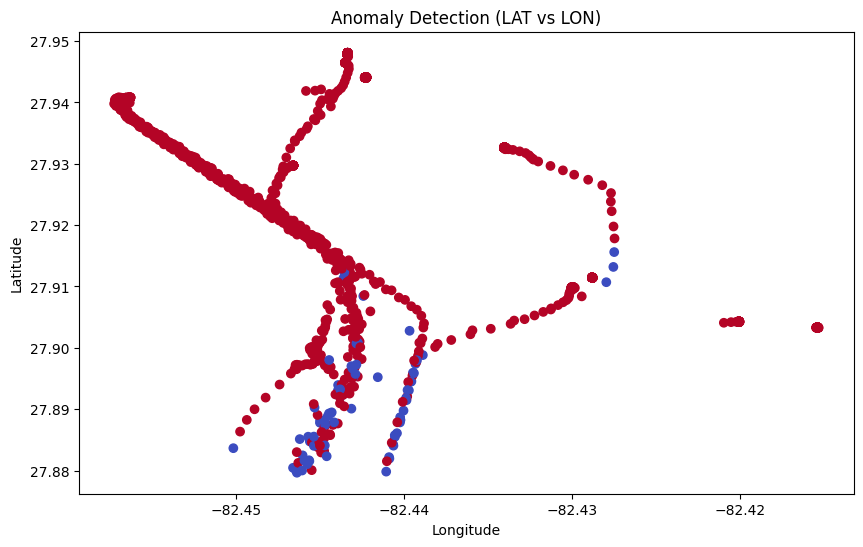

In [14]:
# Optional: Visualize anomalies (LAT vs LON)
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['LON'], data_cleaned['LAT'], c=data_cleaned['anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomaly Detection (LAT vs LON)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()